In [ ]:

#The "adult.csv" dataset, also known as the Census Income dataset, contains various demographic and employment-related attributes that can be directly linked to the objectives of the two-pot retirement system in South Africa. Here's how this dataset relates to the system's objectives:

Relevance to the Two-Pot System Objectives
Predicting Employee Withdrawals:

Demographic Features: The dataset includes features such as age, education level, work experience, and marital status. These demographics are critical in understanding which employees might be inclined to withdraw funds from the accessible pot based on their financial situation, obligations, and life stage.
Income Levels: The dataset contains income information that can help identify employees with financial stress who may need to access their accessible pot for emergencies. Understanding income distributions and financial pressures can inform predictions about withdrawal behaviors.
Forecasting Long-Term Savings Growth:

#Employment History: Features such as years of service and job type can be used to assess an employee's likelihood of contributing to the locked pot over time. Employees with stable jobs and longer tenures may have different saving patterns compared to those with less stability.
Contribution Potential: By analyzing the income levels and employment status, one can estimate potential contributions to the locked pot. This understanding is essential for forecasting how much will be available for retirement.
Analyzing Employee Feedback:

#Sentiment Analysis: While the "adult.csv" dataset itself doesn't contain qualitative feedback, it can help develop a framework for understanding employee demographics and financial behavior, which can be correlated with sentiment from employee surveys regarding the two-pot system. If qualitative feedback is gathered from other sources, understanding the demographics and employment status of respondents will be crucial for interpreting their sentiments regarding the system's effectiveness.
Conclusion
The "adult.csv" dataset is valuable because it provides insights into the demographics and financial situations of employees, which are essential for predicting withdrawal behaviors and understanding the long-term implications of the two-pot retirement system. By leveraging machine learning techniques, you can build predictive models that inform financial institutions and policymakers about employee behavior regarding their retirement savings.

If you have any more questions or need further clarification on how to approach this dataset for your exam, feel free to ask!
                                                                                            

#this is the link (https://www.kaggle.com/datasets/lovishbansal123/adult-census-income)






In [1]:
import pandas as pd

# Load the dataset
url = "adult.csv"
df = pd.read_csv(url)

# Display the first few rows and the columns
print(df.head())
print(df.columns)


   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [2]:
# Check for missing values
print(df.isnull().sum())

# Example: Dropping missing values
df.dropna(inplace=True)

# Example: Feature Engineering
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 70, 100], labels=['Young', 'Middle_Aged', 'Older', 'Senior'])

# Example: Encoding categorical variables
df = pd.get_dummies(df, columns=['sex', 'race', 'age_group'], drop_first=True)


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url = 'adult.csv'  # Replace with the path to your dataset if it's not in the same directory
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

# Preprocess the dataset
# Assuming 'withdrawal' is a binary column indicating withdrawals (1 = will withdraw, 0 = will not withdraw)
# You may need to create this column based on the existing data.

# Example: Creating a binary 'withdrawal' column based on some criteria
# Replace this with your actual logic for determining withdrawal
df['withdrawal'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)  # Example condition

# Define features and target variable
X = df.drop(['withdrawal'], axis=1)  # Exclude the target variable
y = df['withdrawal']

# Convert categorical features to numerical using Label Encoding
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store the encoder for future use if needed

# Check for any missing values in the features
print("Missing values in features:", X.isnull().sum().sum())
print("Missing values in target:", y.isnull().sum())

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'adult.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
print(data.head())


   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Example feedback dataset (You would typically load this from a CSV or other source)
data = {
    'feedback': [
        "I love the new retirement plan!",
        "This system is terrible and confusing.",
        "It's okay, but I expected better.",
        "I appreciate the flexibility it offers.",
        "The rules are too strict."
    ],
    'sentiment': ['positive', 'negative', 'neutral', 'positive', 'negative']
}

feedback_df = pd.DataFrame(data)

# Prepare the data
X_feedback = feedback_df['feedback']
y_feedback = feedback_df['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_feedback, y_feedback, test_size=0.2, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a logistic regression model
model_feedback = LogisticRegression()
model_feedback.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model_feedback.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Example of predicting new feedback
new_feedback_data = [
    "The retirement savings options are great!",
    "I'm frustrated with the process.",
    "It works well for my needs."
]

# Transform new feedback data
X_new_feedback = vectorizer.transform(new_feedback_data)

# Make predictions on new feedback
predictions = model_feedback.predict(X_new_feedback)

# Display predictions
for feedback, sentiment in zip(new_feedback_data, predictions):
    print(f"Feedback: '{feedback}' --> Predicted Sentiment: {sentiment}")



Accuracy: 0.0
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Feedback: 'The retirement savings options are great!' --> Predicted Sentiment: positive
Feedback: 'I'm frustrated with the process.' --> Predicted Sentiment: positive
Feedback: 'It works well for my needs.' --> Predicted Sentiment: positive


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classif

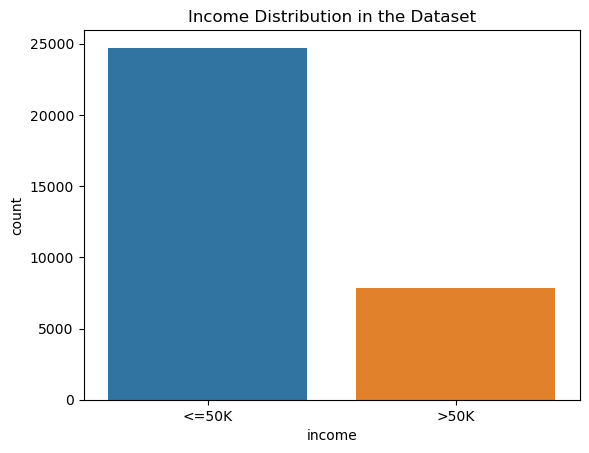

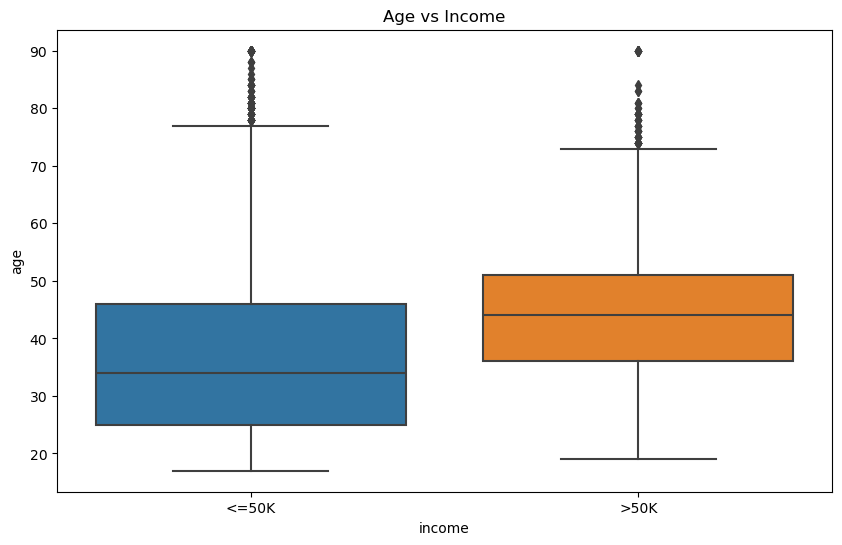

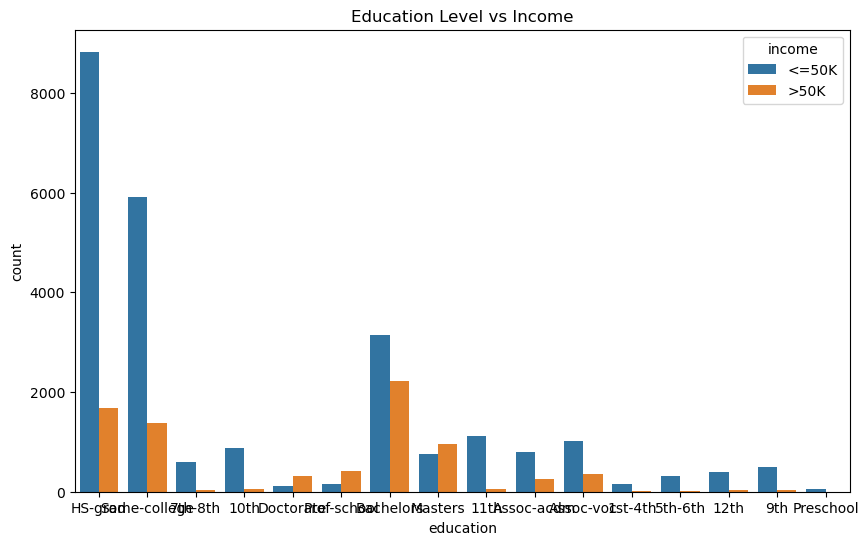

In [11]:
import seaborn as sns

# Plot the distribution of income (assuming income affects withdrawal behavior)
sns.countplot(x='income', data=data)
plt.title('Income Distribution in the Dataset')
plt.show()

# Plot withdrawals based on other demographic features, like 'age' and 'education'
plt.figure(figsize=(10,6))
sns.boxplot(x='income', y='age', data=data)
plt.title('Age vs Income')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='education', hue='income', data=data)
plt.title('Education Level vs Income')
plt.show()


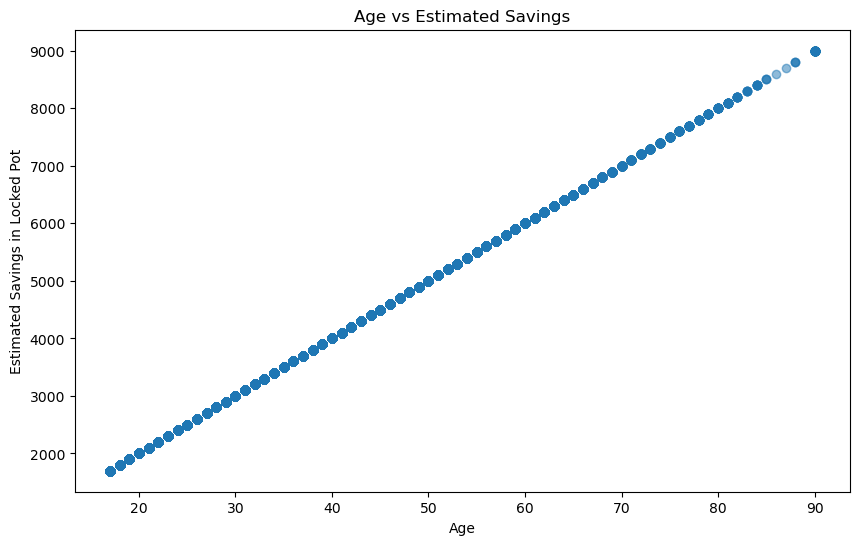

In [12]:
# Assuming we have a 'years_of_service' feature and contributions grow with time
# Plot age against hypothetical savings contributions
data['savings'] = data['age'] * 100  # Hypothetical savings contributions based on age

plt.figure(figsize=(10,6))
plt.plot(data['age'], data['savings'], 'o', alpha=0.5)
plt.title('Age vs Estimated Savings')
plt.xlabel('Age')
plt.ylabel('Estimated Savings in Locked Pot')
plt.show()


In [ ]:
#SENTIMENT ANALYSIS
To conduct sentiment analysis on employee feedback regarding the two-pot retirement system, you can follow a structured approach. Here’s how you might apply Natural Language Processing (NLP) techniques to categorize the feedback into positive, negative, or neutral sentiments:

1. Data Collection
Gather Feedback: Collect employee feedback from surveys, interviews, or social media regarding their experiences with the two-pot retirement system. This data can be in the form of textual comments, reviews, or responses.
2. Preprocessing the Text
Cleaning the Data:
Remove any irrelevant characters, numbers, or special symbols that don’t contribute to sentiment analysis (e.g., HTML tags, URLs).
Normalize the text by converting it to lowercase to ensure consistency.
Tokenization: Break down the text into individual words or phrases (tokens). This helps in analyzing the frequency and sentiment associated with specific words.
Removing Stop Words: Remove common words that do not carry significant meaning (e.g., "and," "the," "is") to focus on more meaningful words.
3. Feature Extraction
Vectorization: Convert the cleaned text data into numerical format so that it can be used in machine learning models. This can be done using:
Bag of Words (BoW): Represents the text based on word counts.
Term Frequency-Inverse Document Frequency (TF-IDF): Highlights important words in the text while diminishing the weight of common words across all documents.
4. Sentiment Classification
Labeling the Data: If labeled data is available, you can categorize feedback into positive, negative, or neutral sentiments based on predefined criteria (e.g., a sentiment score).
Machine Learning Models: Use machine learning algorithms to classify the sentiments:
Logistic Regression: Simple and effective for binary and multi-class classification tasks.
Support Vector Machines (SVM): Effective in high-dimensional spaces and often used for text classification.
Random Forest: An ensemble method that can improve accuracy and reduce overfitting.
5. Natural Language Processing Techniques
Sentiment Analysis Libraries: Utilize pre-built libraries and models that are designed for sentiment analysis:
VADER (Valence Aware Dictionary and sEntiment Reasoner): A lexicon and rule-based sentiment analysis tool, especially effective for social media texts.
TextBlob: A simple library for processing textual data, providing sentiment polarity and subjectivity scores.
Transformers (BERT, DistilBERT): Advanced models that can be fine-tuned for sentiment analysis tasks, capturing contextual nuances in the language.
6. Evaluation of the Model
Confusion Matrix: Analyze true positives, false positives, true negatives, and false negatives to assess model performance.
Classification Report: Evaluate precision, recall, and F1-score to understand how well the model performs across different sentiment categories.
7. Interpretation of Results
Insights Generation: Analyze the sentiment categorization to identify patterns in employee perceptions:
What aspects of the two-pot system are viewed positively or negatively?
Are there common concerns or suggestions for improvement among employees?
Reporting: Summarize findings in a report, highlighting key sentiments and recommendations for policymakers based on the feedback.
Conclusion
Sentiment analysis using NLP techniques can provide valuable insights into employee attitudes towards the two-pot retirement system, helping stakeholders understand perceptions and improve the system's effectiveness. By categorizing feedback into positive, negative, and neutral sentiments, organizations can better address employee concerns and enhance overall satisfaction.






